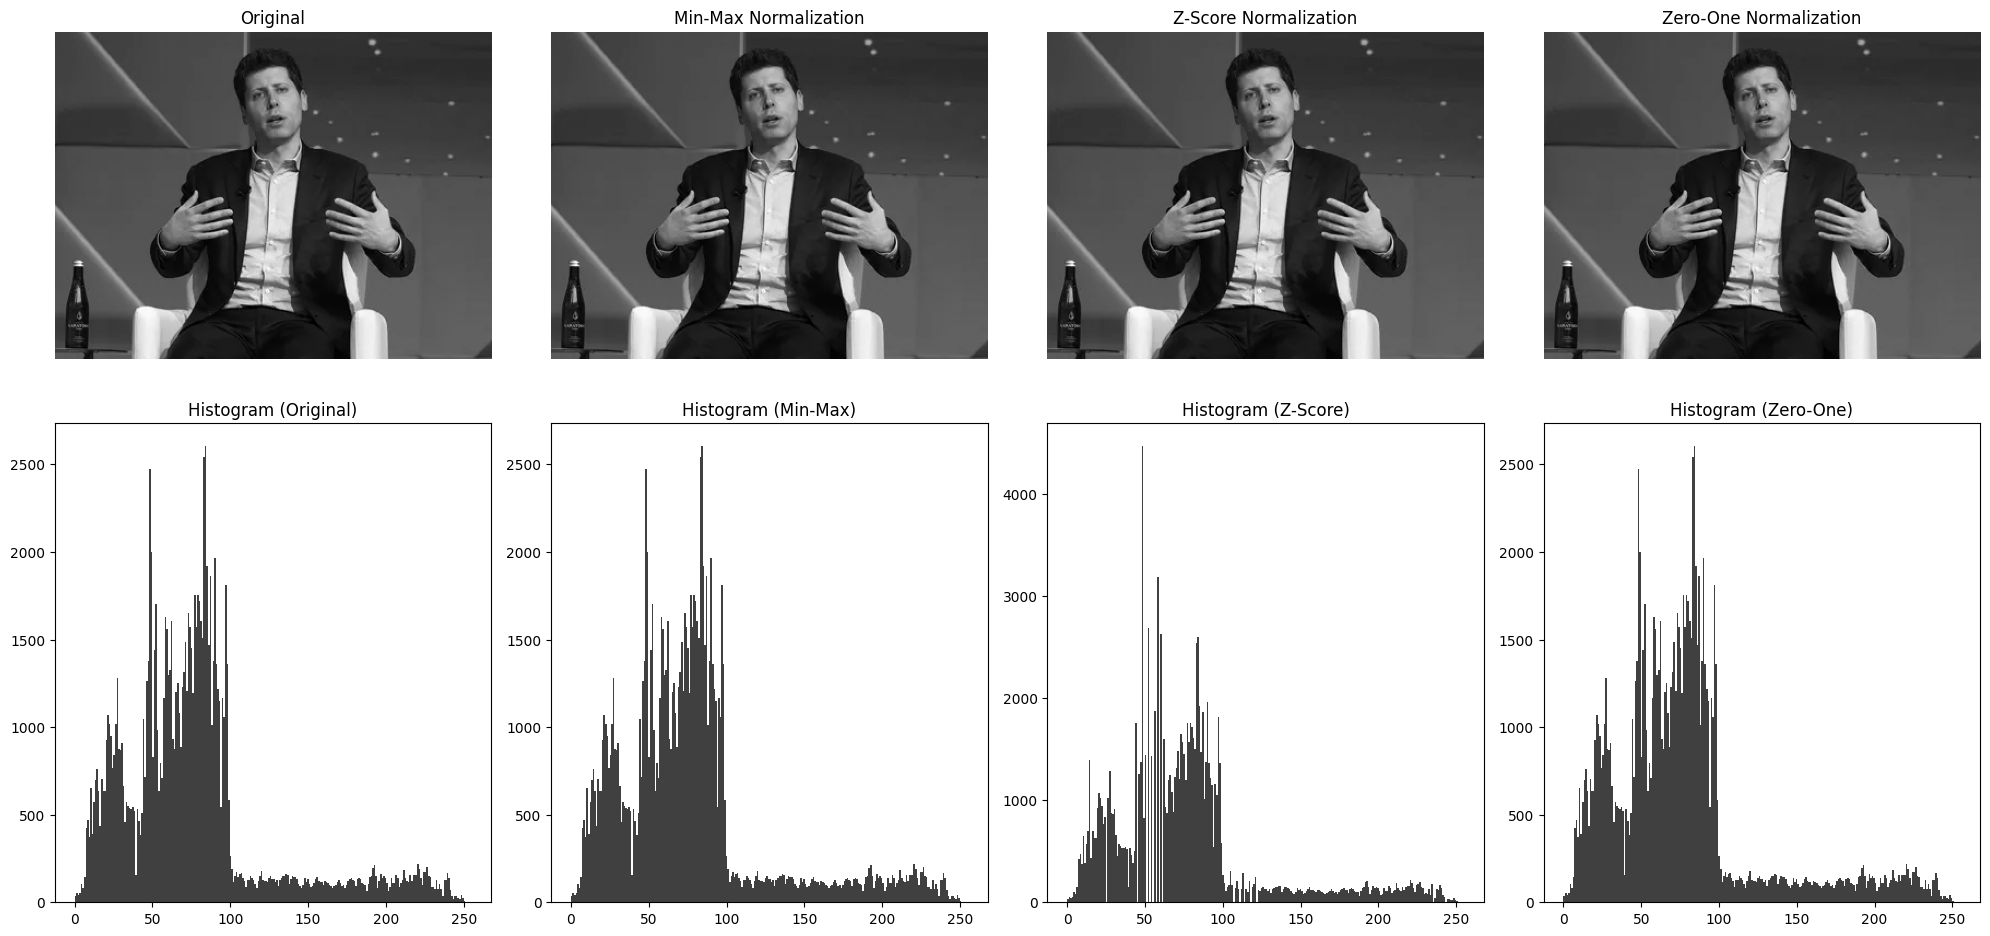

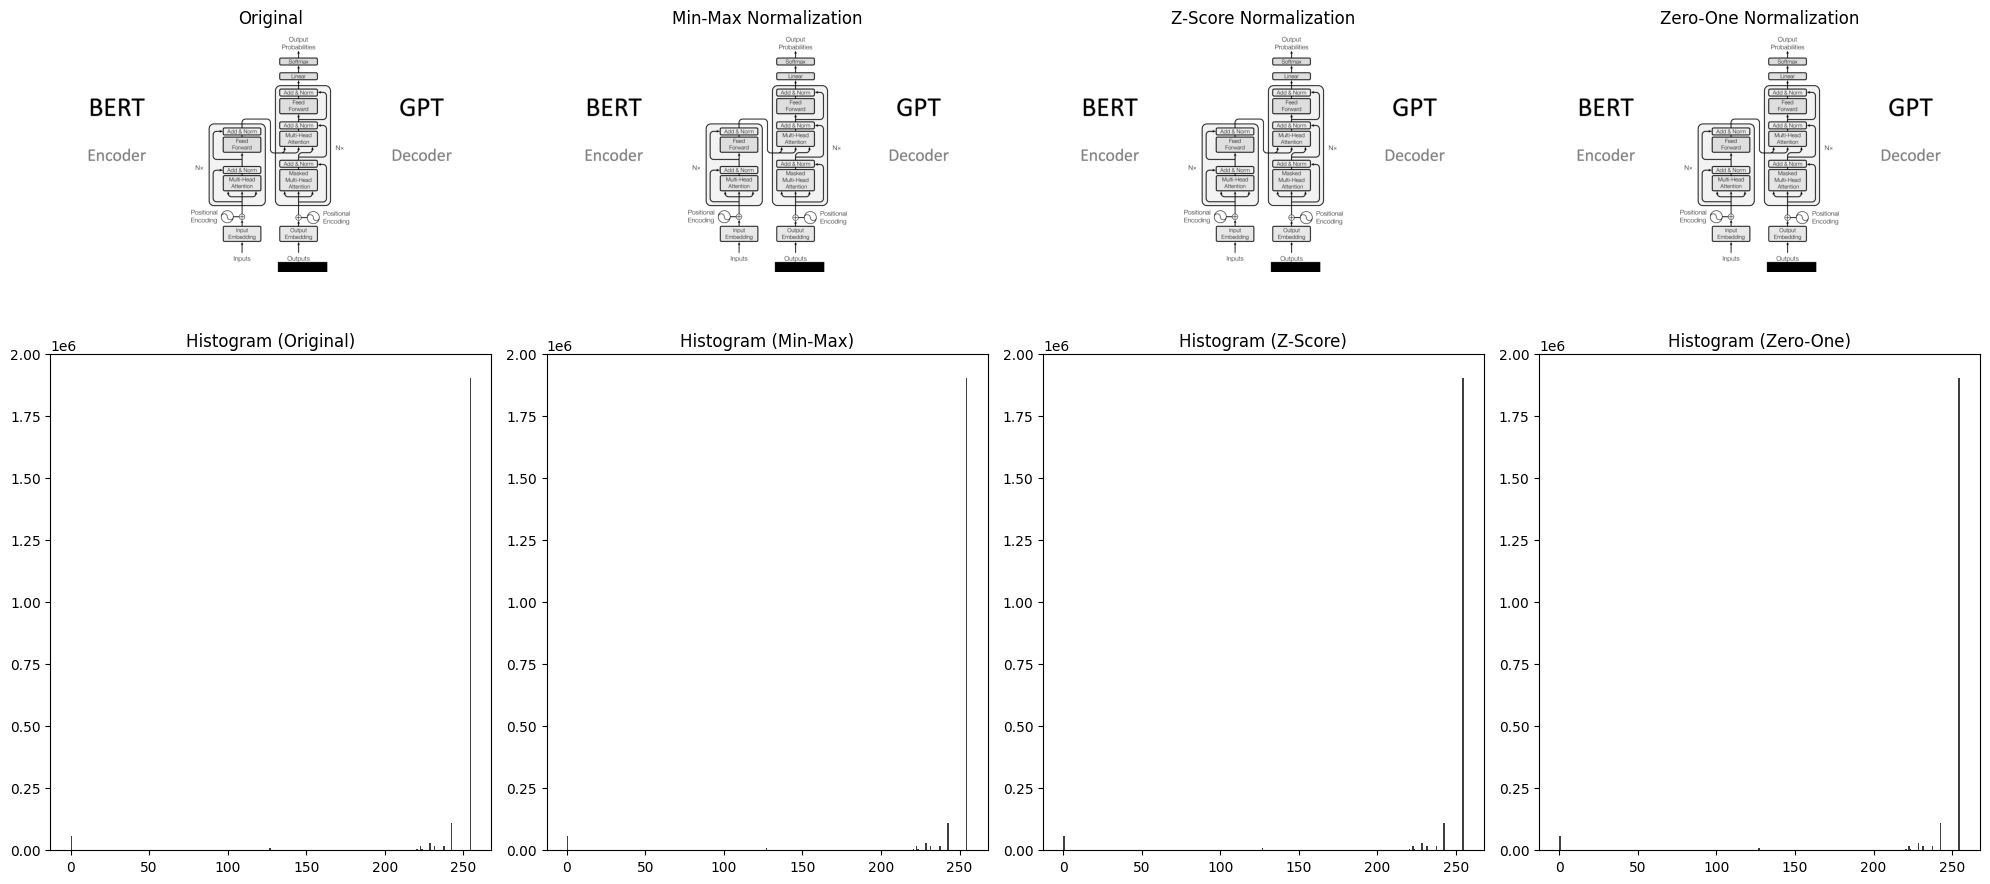

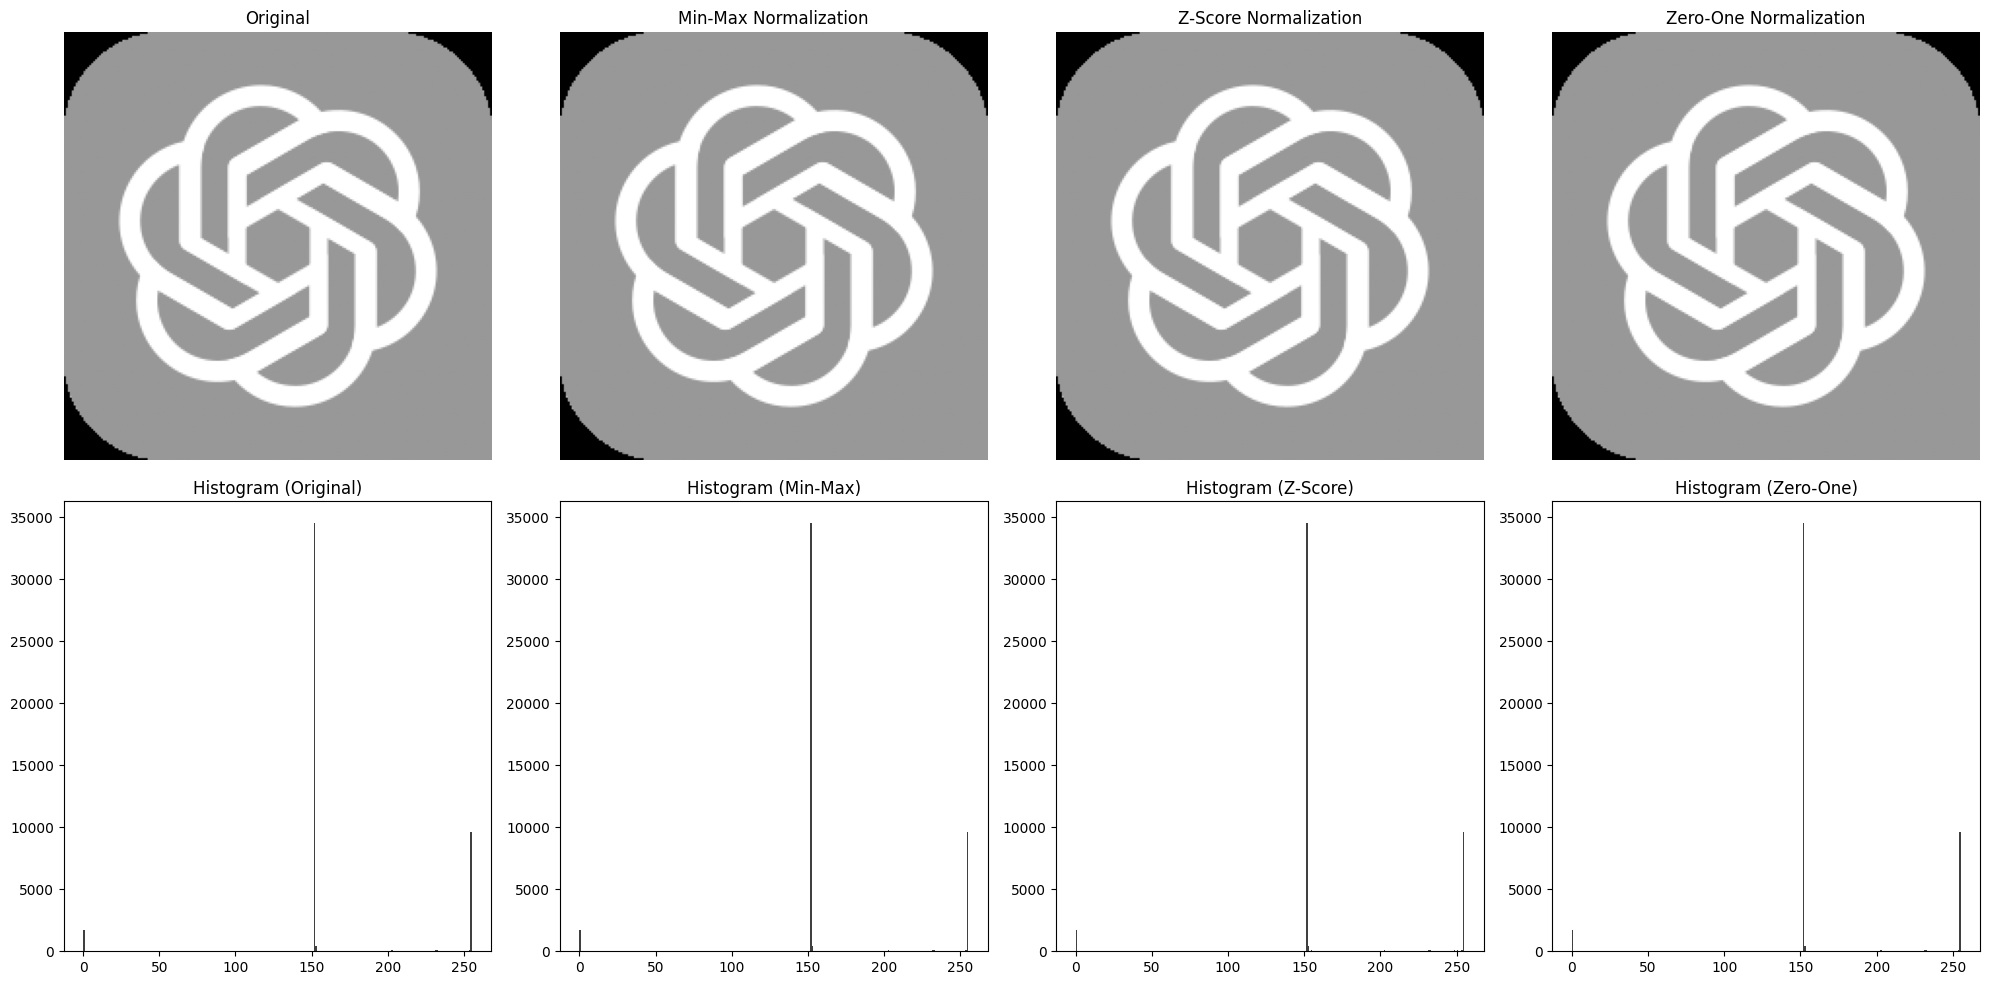

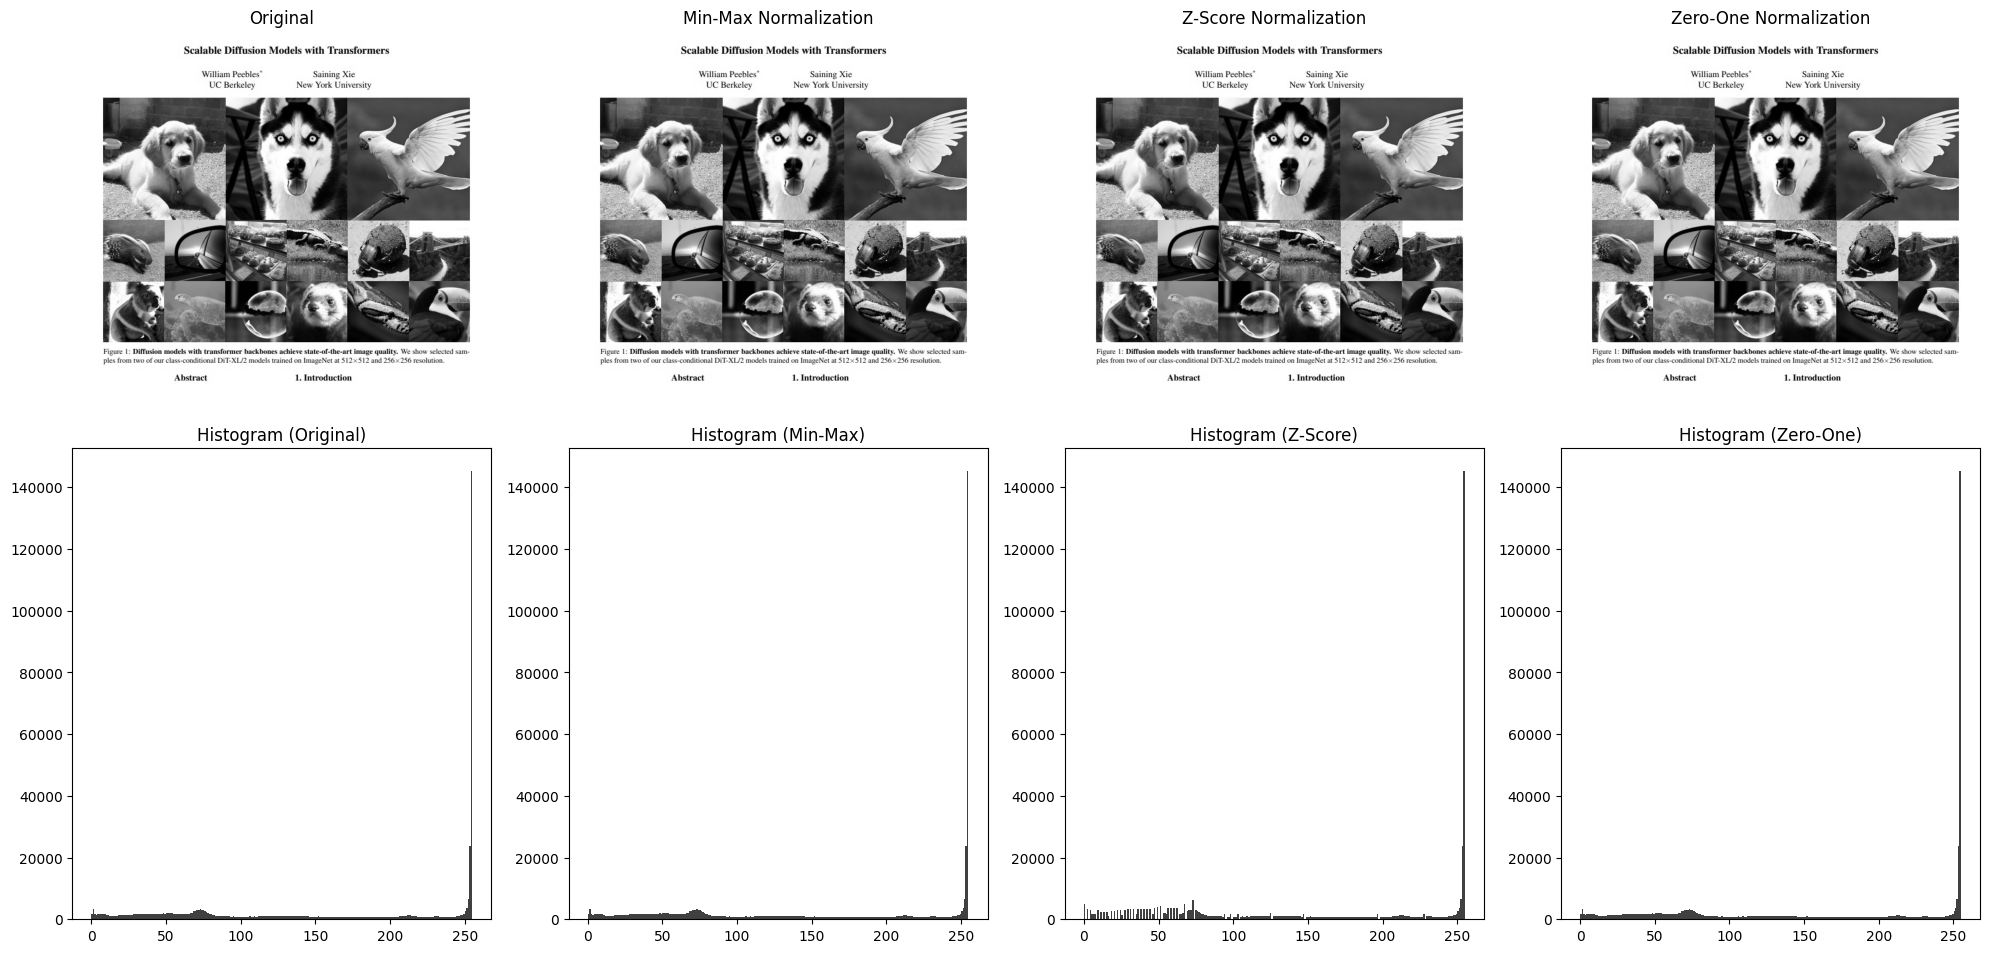

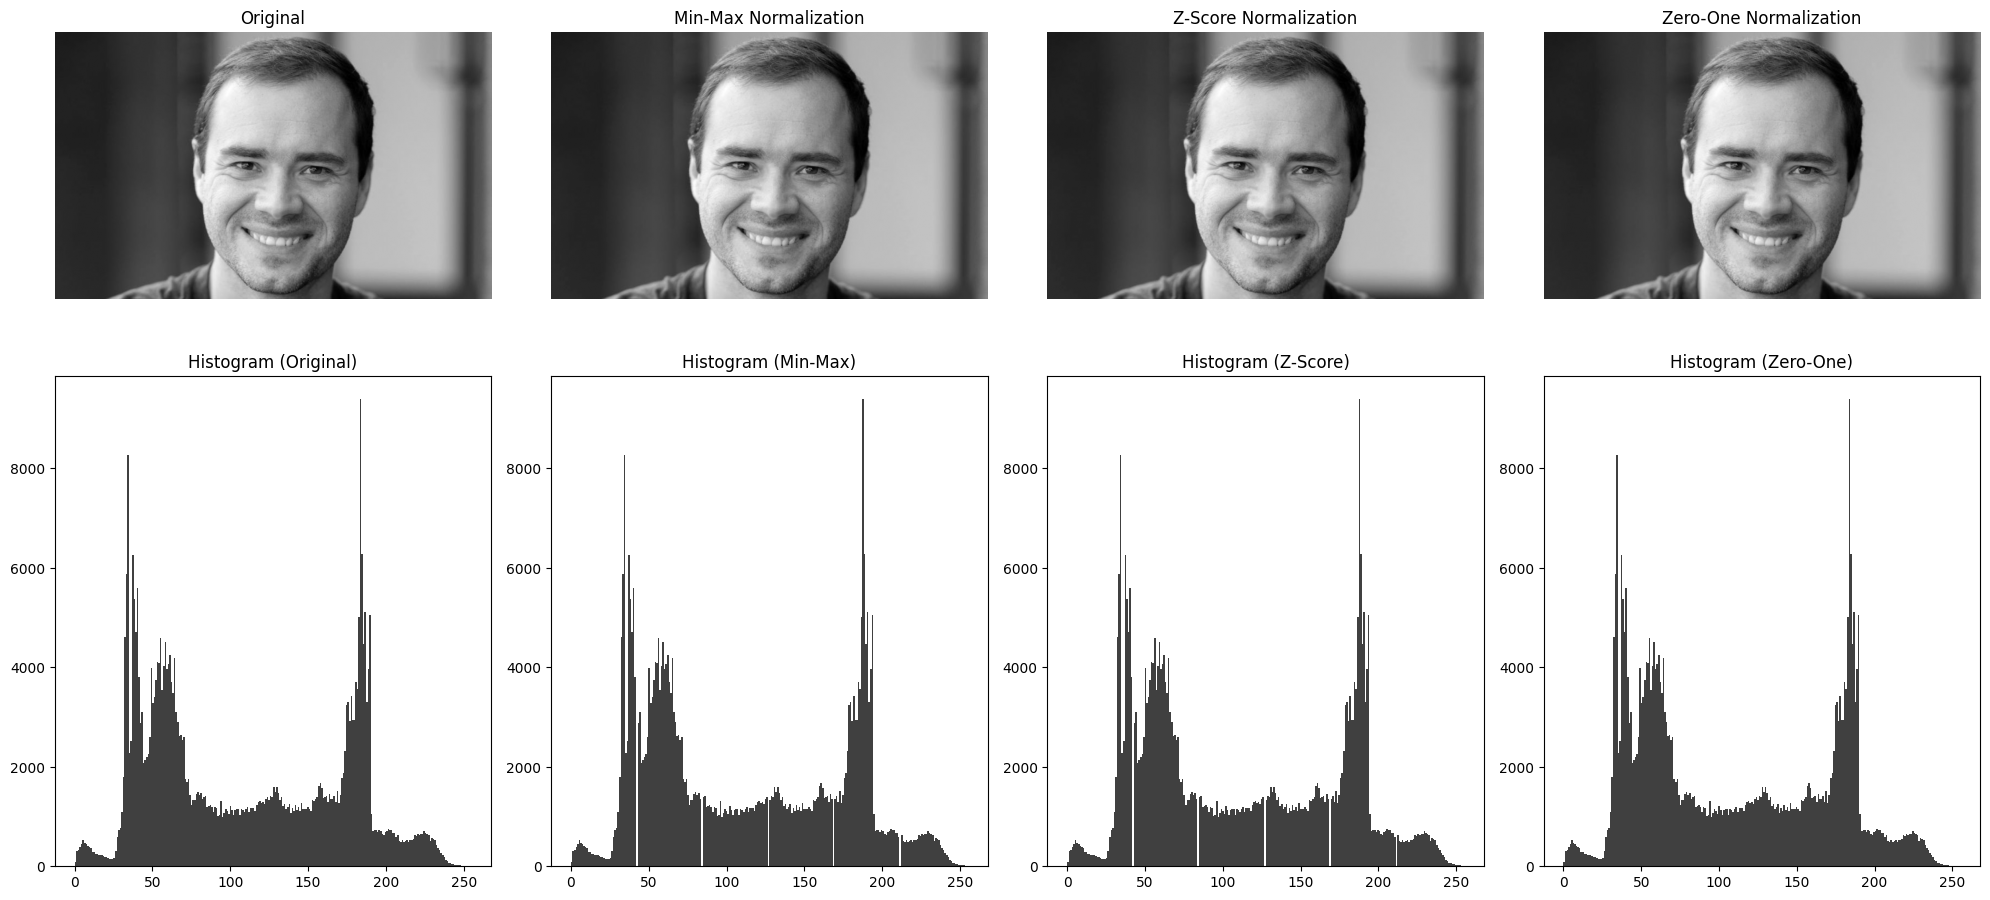

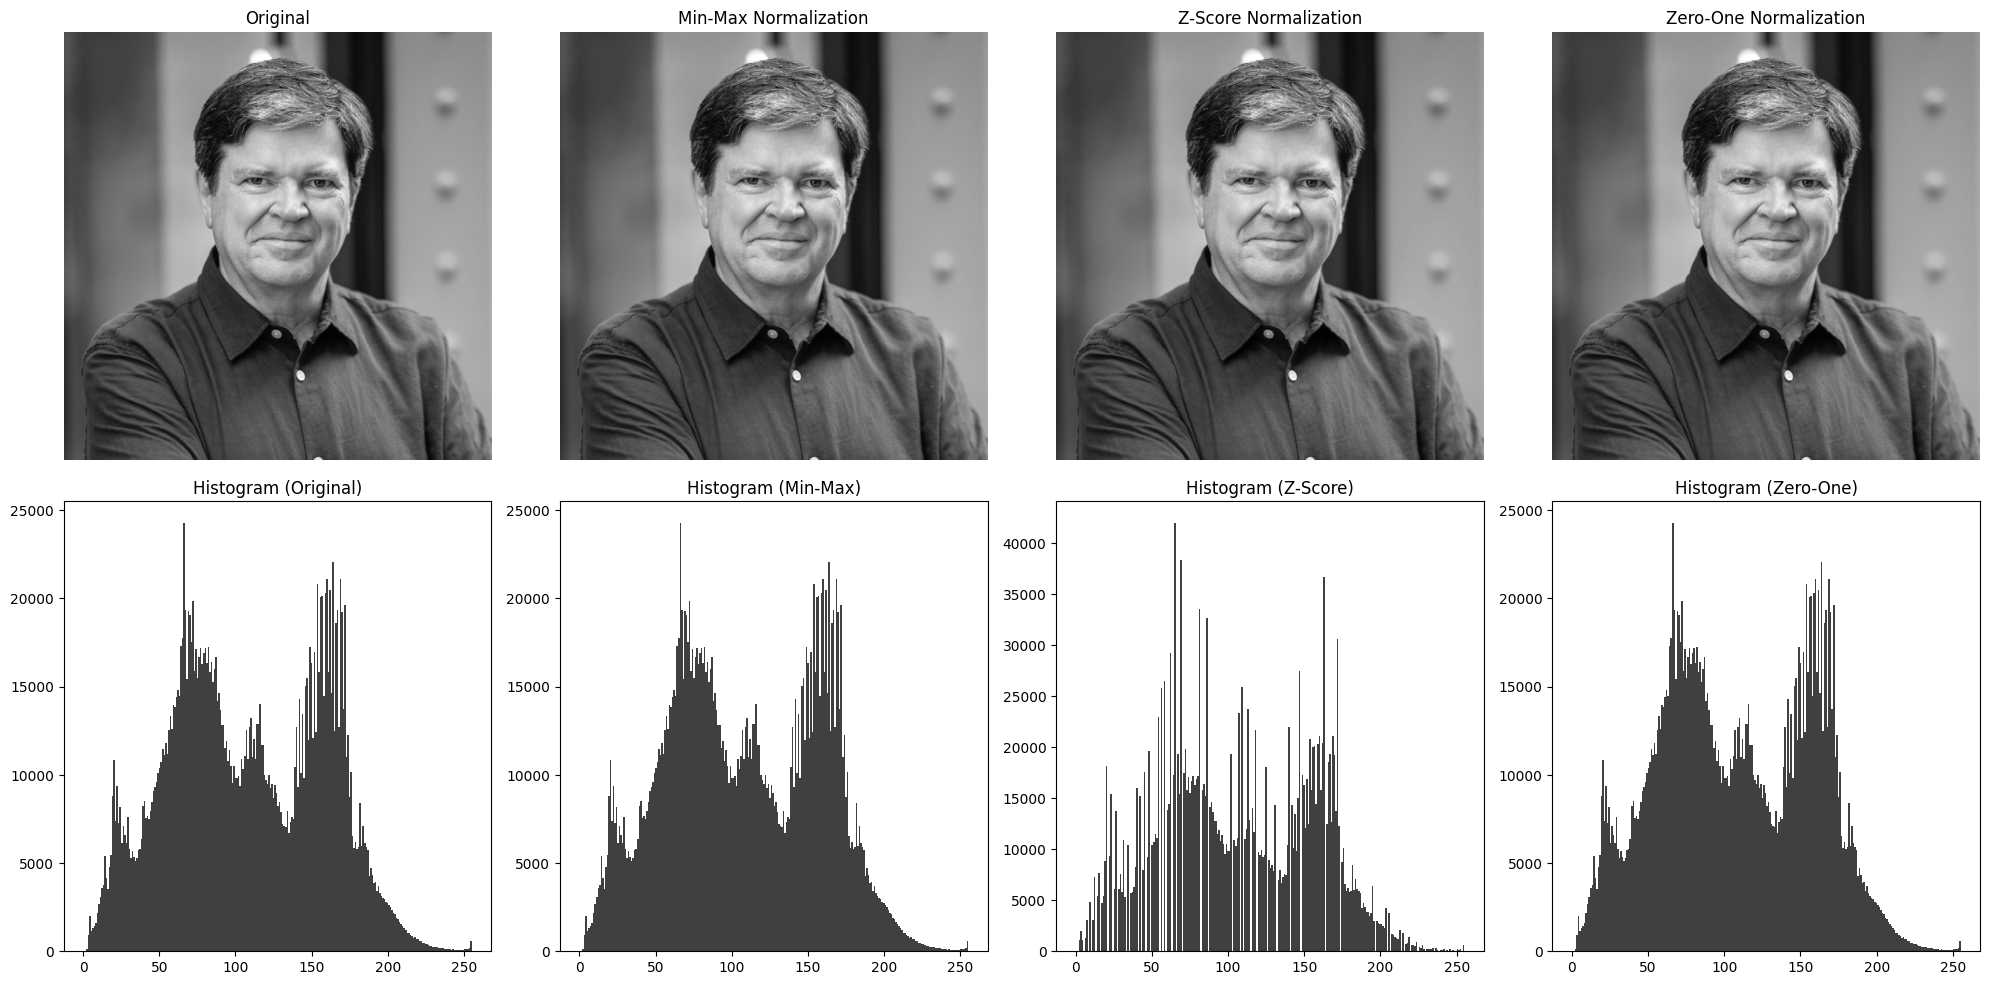

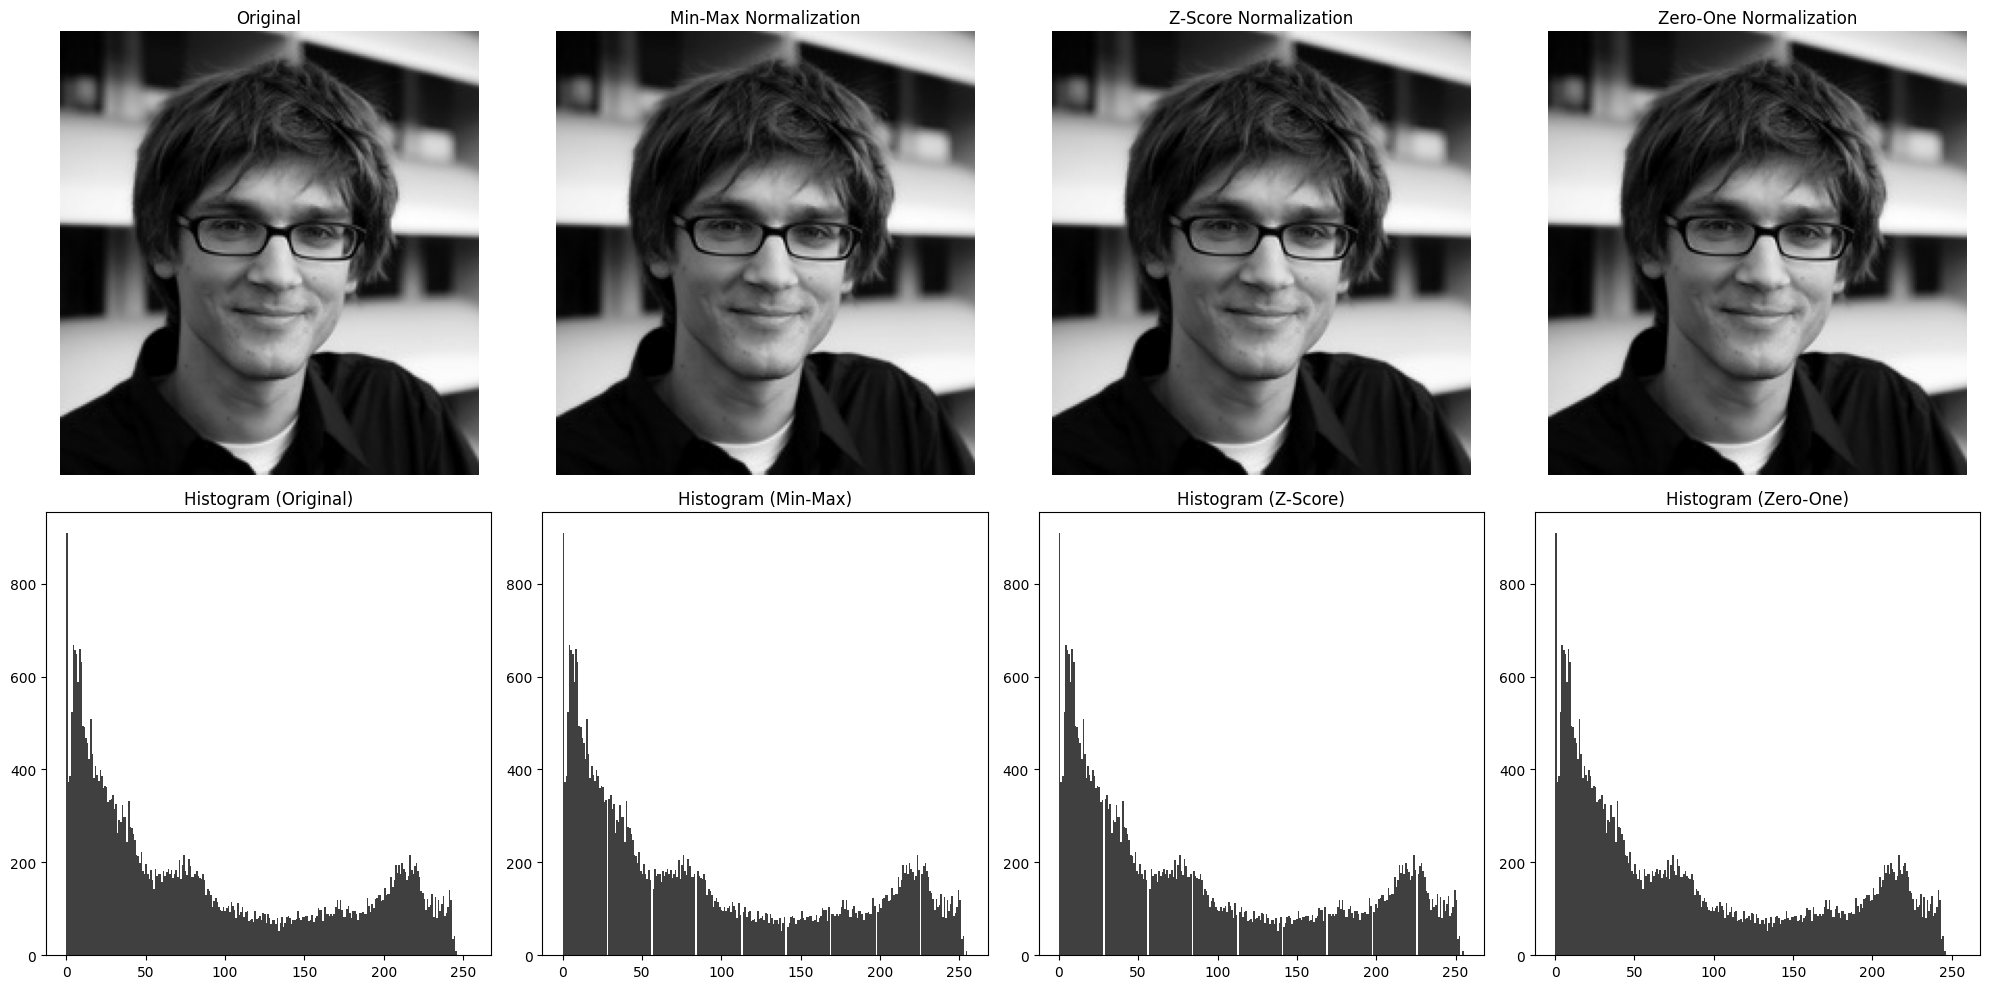

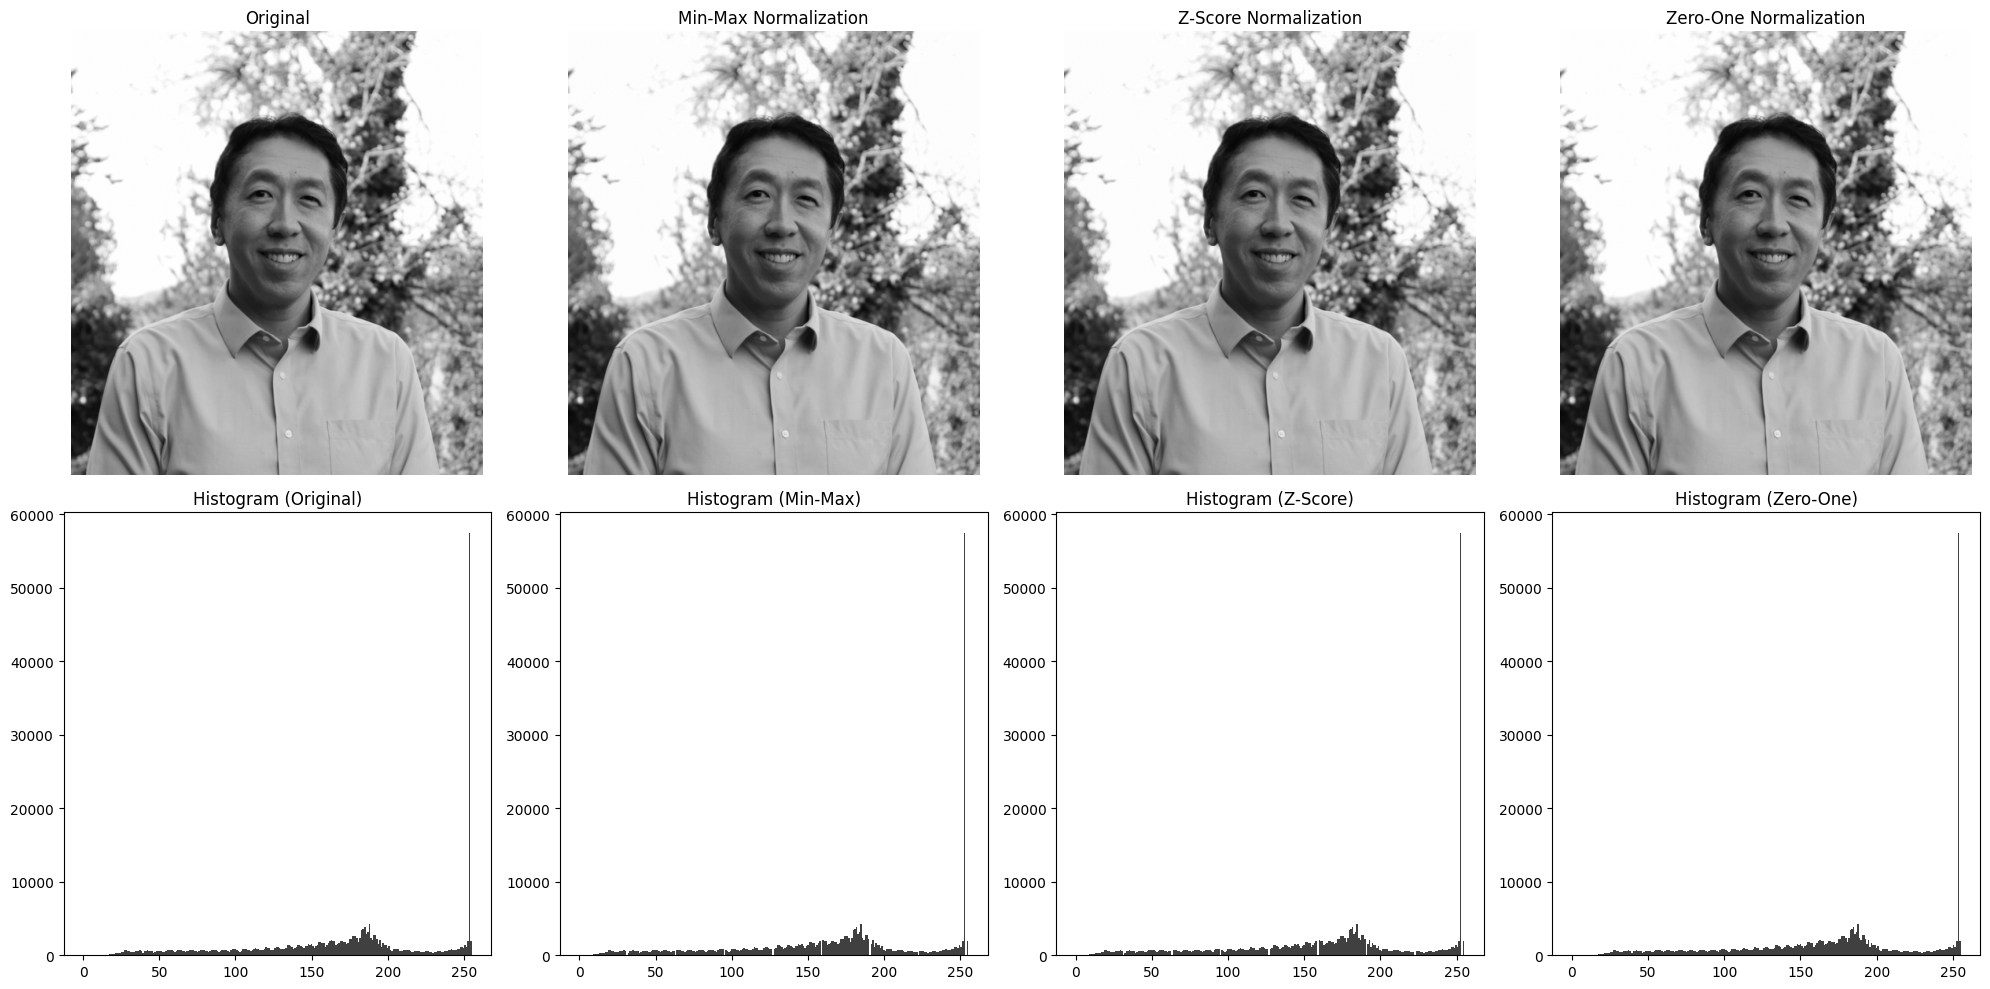

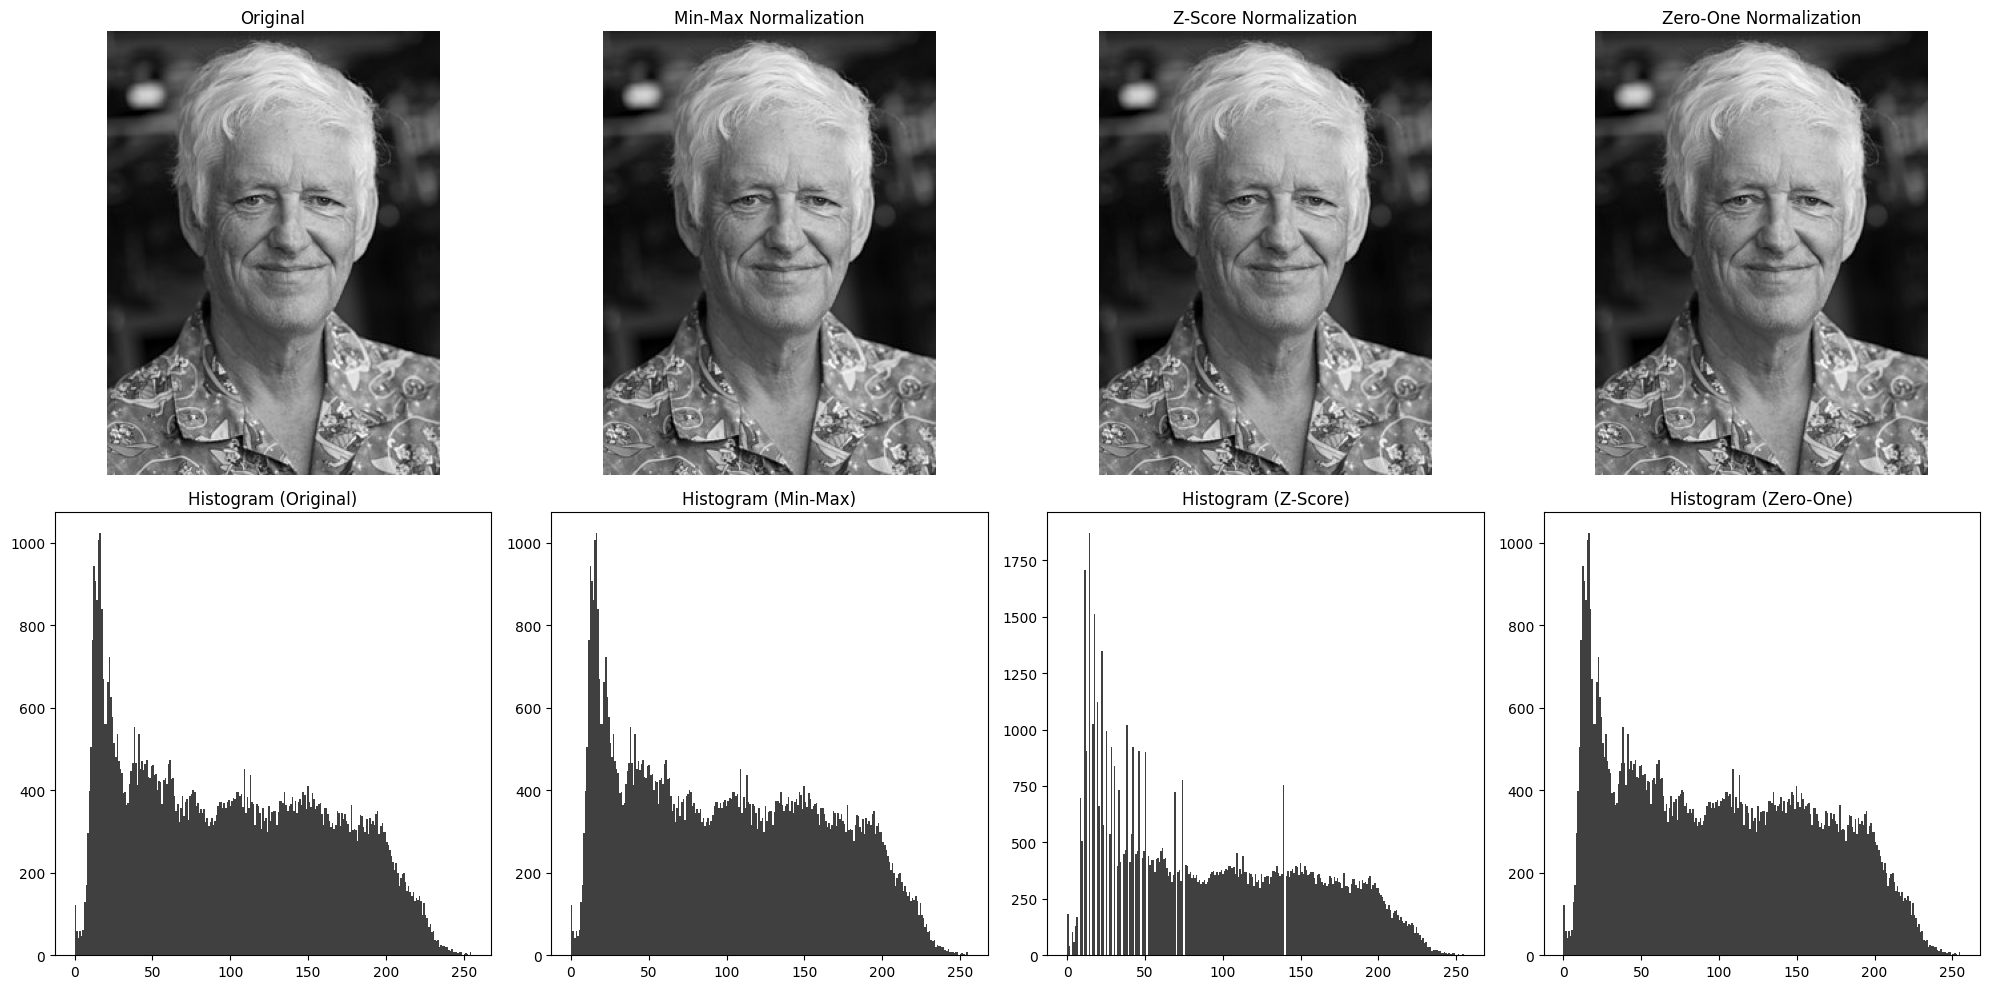

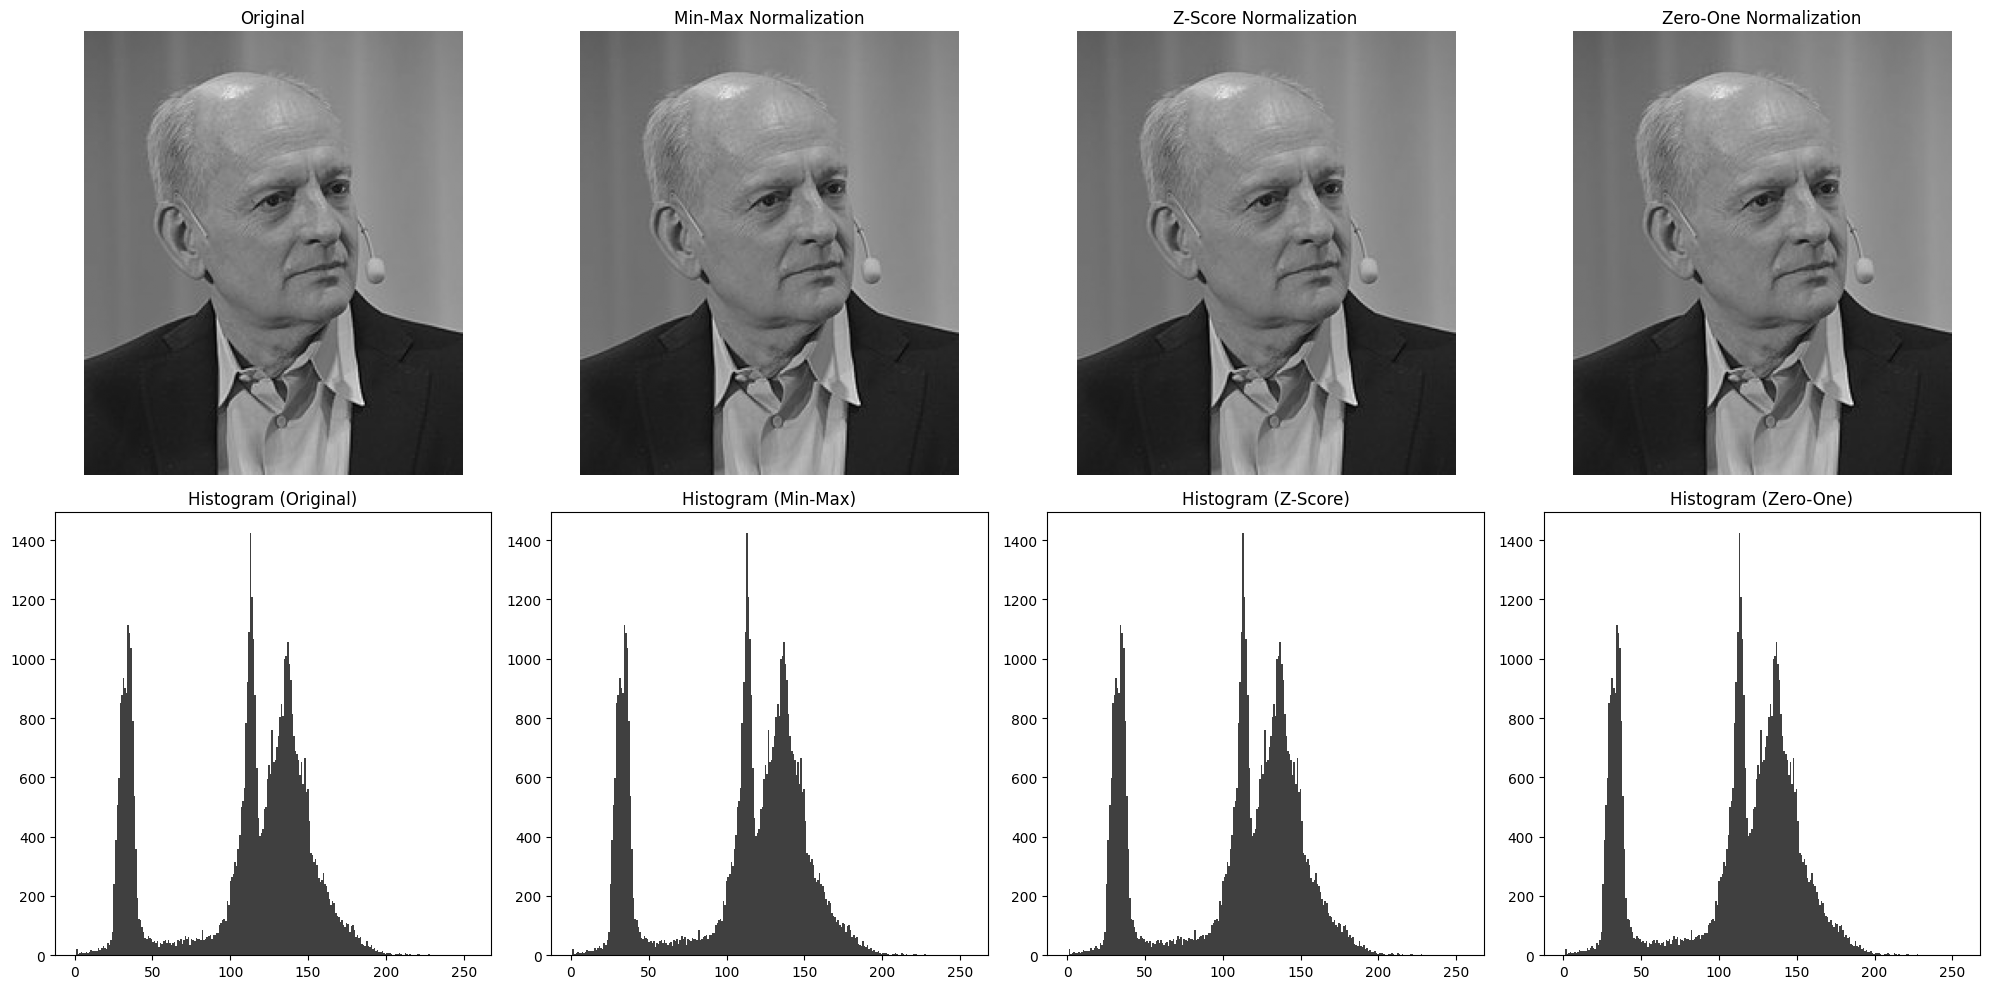

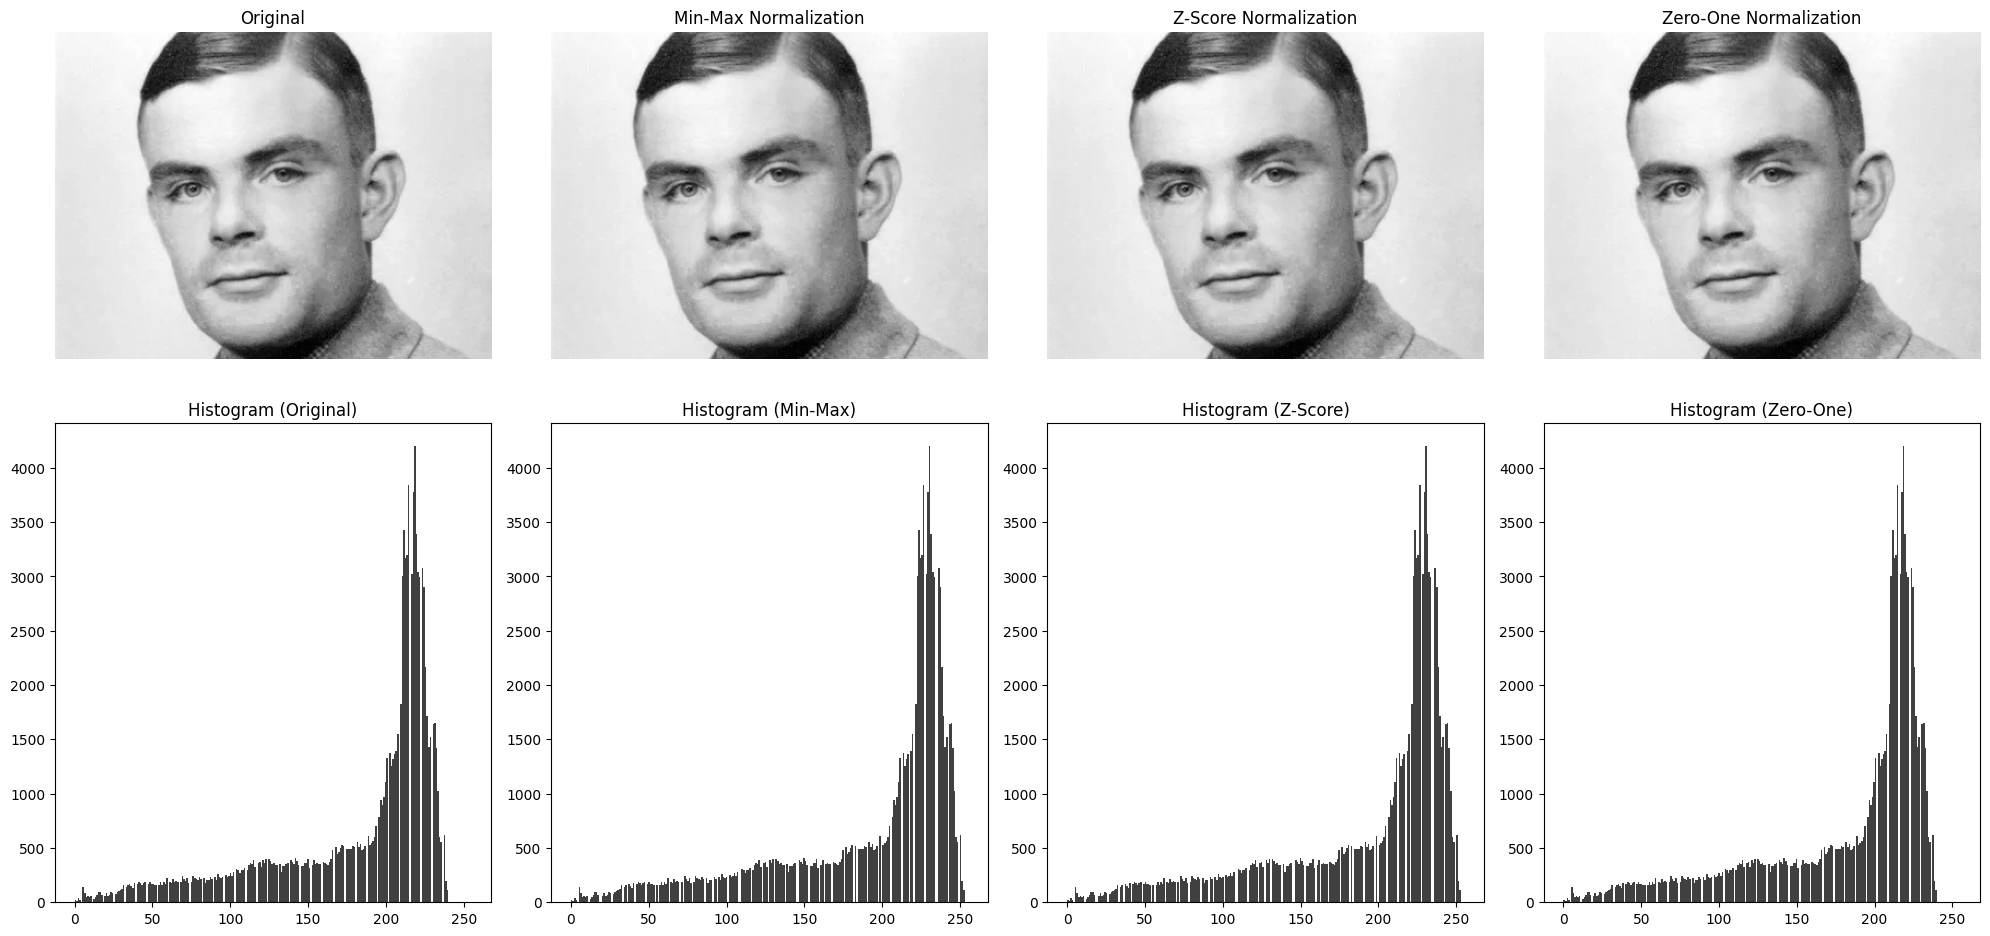

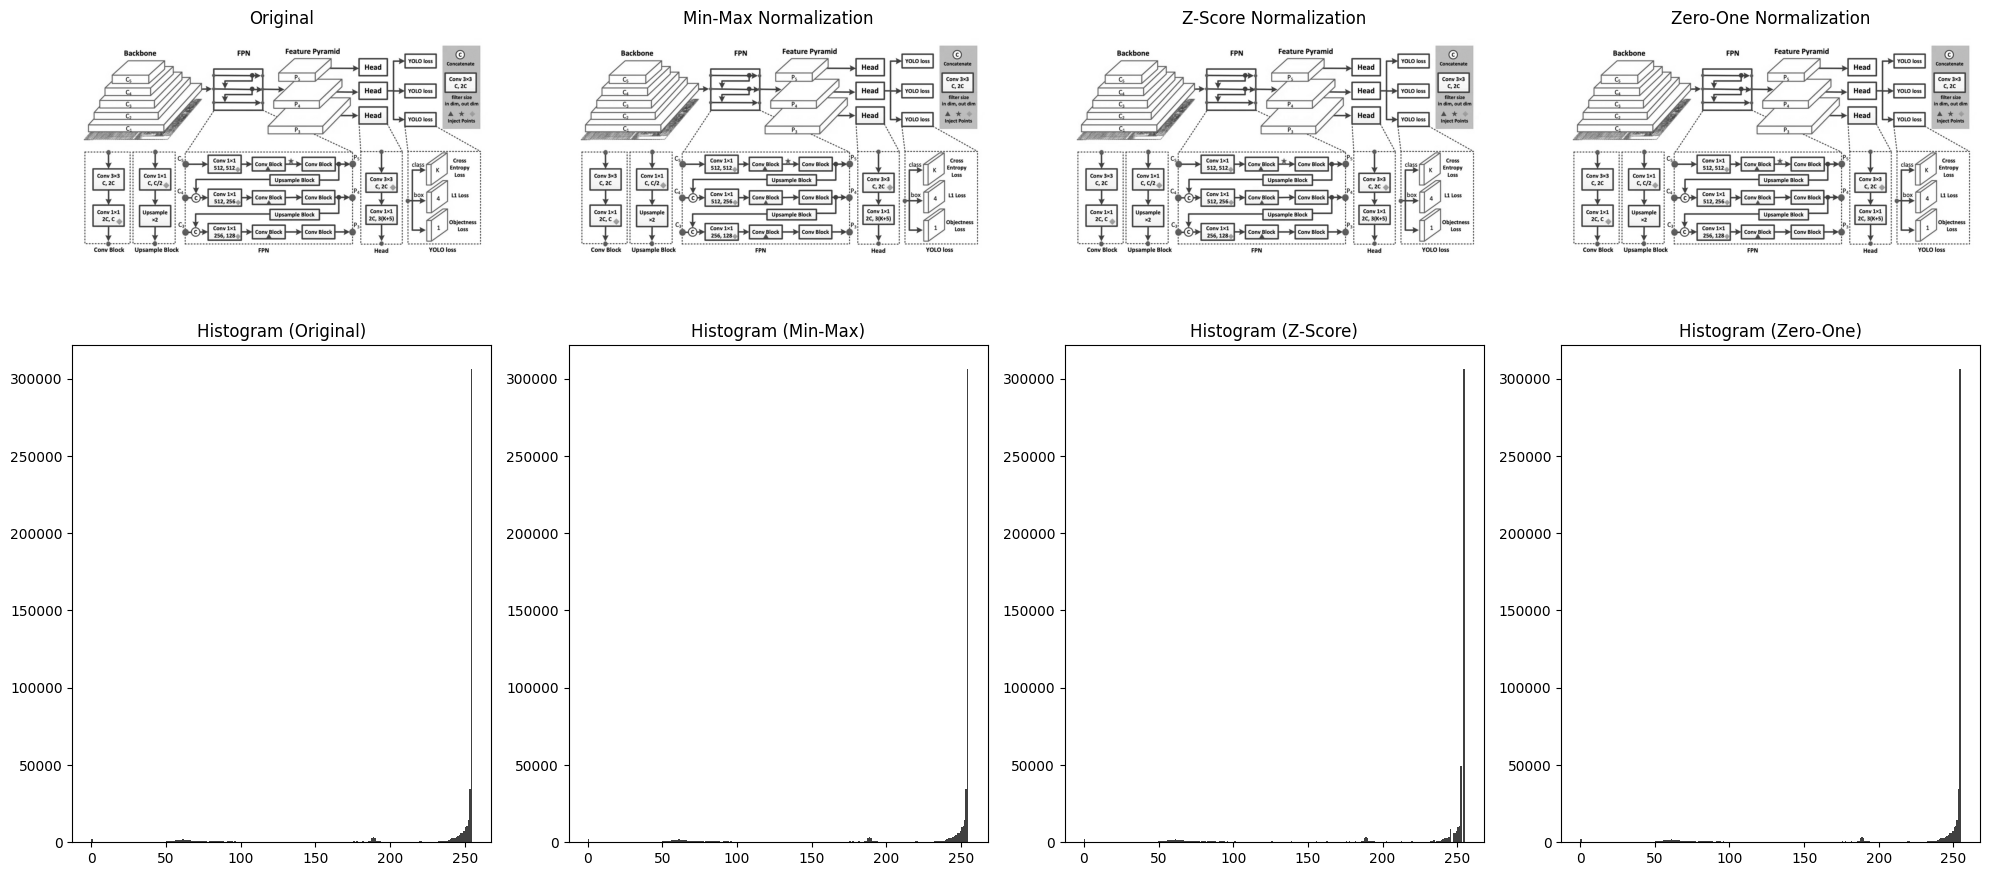

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing images
directory = "data/images"

# Function to normalize image using min-max normalization
def min_max_normalization(img_array):
    normalized = (img_array - img_array.min()) / (img_array.max() - img_array.min())
    return (normalized * 255).astype(np.uint8)

# Function to normalize image using z-score normalization
def z_score_normalization(img_array):
    mean = img_array.mean()
    std = img_array.std()
    normalized = (img_array - mean) / std
    normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())
    return (normalized * 255).astype(np.uint8)

# Function to normalize image to range [0, 1]
def zero_one_normalization(img_array):
    normalized = img_array / 255.0
    return (normalized * 255).astype(np.uint8)

# Load, normalize and display images
for filename in os.listdir(directory):
    if filename.endswith((".jpg", ".webp", ".png")):
        img_path = os.path.join(directory, filename)
        img = Image.open(img_path).convert("L")
        img_array = np.array(img)

        # Apply different normalizations
        min_max_img = min_max_normalization(img_array)
        z_score_img = z_score_normalization(img_array)
        zero_one_img = zero_one_normalization(img_array)

        # Create a figure with subplots for each normalization and histograms
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        
        # Display the original image
        axes[0, 0].imshow(img, cmap="gray")
        axes[0, 0].set_title("Original")
        axes[0, 0].axis('off')

        # Display the histogram of the original image
        axes[1, 0].hist(img_array.flatten(), bins=256, range=(0, 255), color='black', alpha=0.75)
        axes[1, 0].set_title("Histogram (Original)")

        # Display the min-max normalized image
        axes[0, 1].imshow(min_max_img, cmap="gray")
        axes[0, 1].set_title("Min-Max Normalization")
        axes[0, 1].axis('off')

        # Display the histogram of the min-max normalized image
        axes[1, 1].hist(min_max_img.flatten(), bins=256, range=(0, 255), color='black', alpha=0.75)
        axes[1, 1].set_title("Histogram (Min-Max)")

        # Display the z-score normalized image
        axes[0, 2].imshow(z_score_img, cmap="gray")
        axes[0, 2].set_title("Z-Score Normalization")
        axes[0, 2].axis('off')

        # Display the histogram of the z-score normalized image
        axes[1, 2].hist(z_score_img.flatten(), bins=256, range=(0, 255), color='black', alpha=0.75)
        axes[1, 2].set_title("Histogram (Z-Score)")

        # Display the zero-one normalized image
        axes[0, 3].imshow(zero_one_img, cmap="gray")
        axes[0, 3].set_title("Zero-One Normalization")
        axes[0, 3].axis('off')

        # Display the histogram of the zero-one normalized image
        axes[1, 3].hist(zero_one_img.flatten(), bins=256, range=(0, 255), color='black', alpha=0.75)
        axes[1, 3].set_title("Histogram (Zero-One)")

        plt.tight_layout()
        plt.show()